In [1]:
!pip install google-cloud-bigquery==2.34.4

In [34]:
%%bigquery df --use_rest_api
SELECT
  depdelay as departure_delay,
  COUNT(1) AS num_flights,
  APPROX_QUANTILES(arrdelay, 10) AS arrival_delay_deciles
FROM
  `cloud-training-demos.airline_ontime_data.flights`
WHERE
 depdelay is not null
GROUP BY
  depdelay
HAVING
  num_flights > 100
ORDER BY
  depdelay ASC

Downloading: 100%|██████████| 641/641 [00:00<00:00, 2107.76rows/s]


In [7]:
df

,departure_delay,num_flights,arrival_delay_deciles
0,-60.0,281,"[-137.0, -65.0, -60.0, -55.0, -36.0, -16.0, -8..."
1,-45.0,262,"[-71.0, -55.0, -50.0, -48.0, -45.0, -43.0, -39..."
2,-44.0,123,"[-62.0, -53.0, -50.0, -48.0, -46.0, -42.0, -40..."
3,-43.0,161,"[-71.0, -55.0, -51.0, -48.0, -45.0, -43.0, -38..."
4,-42.0,193,"[-62.0, -51.0, -48.0, -46.0, -43.0, -41.0, -38..."
...,...,...,...
636,1434.0,346,"[-28.0, -16.0, -13.0, -11.0, -8.0, -6.0, -4.0,..."
637,1435.0,695,"[-27.0, -16.0, -12.0, -9.0, -7.0, -5.0, -3.0, ..."
638,1437.0,111,"[-27.0, -12.0, -9.0, -6.0, -3.0, -2.0, 0.0, 2...."
639,1438.0,165,"[-29.0, -12.0, -9.0, -7.0, -4.0, -2.0, 0.0, 2...."


In [5]:
df.head()

,departure_delay,num_flights,arrival_delay_deciles
0,-60.0,281,"[-137.0, -65.0, -60.0, -55.0, -36.0, -16.0, -8..."
1,-45.0,262,"[-71.0, -55.0, -50.0, -48.0, -45.0, -43.0, -39..."
2,-44.0,123,"[-62.0, -53.0, -50.0, -48.0, -46.0, -42.0, -40..."
3,-43.0,161,"[-71.0, -55.0, -51.0, -48.0, -45.0, -43.0, -38..."
4,-42.0,193,"[-62.0, -51.0, -48.0, -46.0, -43.0, -41.0, -38..."


In [35]:
import pandas as pd
percentiles = df['arrival_delay_deciles'].apply(pd.Series)
percentiles.rename(columns = lambda x : '{0}%'.format(x*10), inplace=True)
percentiles.head()

,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
0,-137.0,-65.0,-60.0,-55.0,-36.0,-16.0,-8.0,-4.0,1.0,8.0,54.0
1,-71.0,-55.0,-50.0,-48.0,-45.0,-43.0,-39.0,-32.0,-14.0,2.0,45.0
2,-62.0,-53.0,-50.0,-48.0,-46.0,-42.0,-40.0,-33.0,-22.0,-3.0,76.0
3,-71.0,-55.0,-51.0,-48.0,-45.0,-43.0,-38.0,-33.0,-18.0,-5.0,48.0
4,-62.0,-51.0,-48.0,-46.0,-43.0,-41.0,-38.0,-33.0,-20.0,-3.0,32.0


In [14]:
type(df['arrival_delay_deciles'][0])

numpy.ndarray

In [9]:
df['arrival_delay_deciles']

0      [-137.0, -65.0, -60.0, -55.0, -36.0, -16.0, -8...
1      [-71.0, -55.0, -50.0, -48.0, -45.0, -43.0, -39...
2      [-62.0, -53.0, -50.0, -48.0, -46.0, -42.0, -40...
3      [-71.0, -55.0, -51.0, -48.0, -45.0, -43.0, -38...
4      [-62.0, -51.0, -48.0, -46.0, -43.0, -41.0, -38...
                             ...                        
636    [-28.0, -16.0, -13.0, -11.0, -8.0, -6.0, -4.0,...
637    [-27.0, -16.0, -12.0, -9.0, -7.0, -5.0, -3.0, ...
638    [-27.0, -12.0, -9.0, -6.0, -3.0, -2.0, 0.0, 2....
639    [-29.0, -12.0, -9.0, -7.0, -4.0, -2.0, 0.0, 2....
640    [-26.0, -12.0, -8.0, -5.0, -3.0, -1.0, 1.0, 5....
Name: arrival_delay_deciles, Length: 641, dtype: object

In [10]:
df['arrival_delay_deciles'].apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,10
0,-137.0,-65.0,-60.0,-55.0,-36.0,-16.0,-8.0,-4.0,1.0,8.0,54.0
1,-71.0,-55.0,-50.0,-48.0,-45.0,-43.0,-39.0,-32.0,-14.0,2.0,45.0
2,-62.0,-53.0,-50.0,-48.0,-46.0,-42.0,-40.0,-33.0,-22.0,-3.0,76.0
3,-71.0,-55.0,-51.0,-48.0,-45.0,-43.0,-38.0,-33.0,-18.0,-5.0,48.0
4,-62.0,-51.0,-48.0,-46.0,-43.0,-41.0,-38.0,-33.0,-20.0,-3.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...
636,-28.0,-16.0,-13.0,-11.0,-8.0,-6.0,-4.0,-2.0,1.0,7.0,1444.0
637,-27.0,-16.0,-12.0,-9.0,-7.0,-5.0,-3.0,0.0,3.0,9.0,1447.0
638,-27.0,-12.0,-9.0,-6.0,-3.0,-2.0,0.0,2.0,4.0,12.0,1447.0
639,-29.0,-12.0,-9.0,-7.0,-4.0,-2.0,0.0,2.0,6.0,12.0,1431.0


In [23]:
pd.concat([df['departure_delay'], percentiles])

,0,0%,10%,100%,20%,30%,40%,50%,60%,70%,80%,90%
0,-60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
636,NaN,-28.0,-16.0,1444.0,-13.0,-11.0,-8.0,-6.0,-4.0,-2.0,1.0,7.0
637,NaN,-27.0,-16.0,1447.0,-12.0,-9.0,-7.0,-5.0,-3.0,0.0,3.0,9.0
638,NaN,-27.0,-12.0,1447.0,-9.0,-6.0,-3.0,-2.0,0.0,2.0,4.0,12.0
639,NaN,-29.0,-12.0,1431.0,-9.0,-7.0,-4.0,-2.0,0.0,2.0,6.0,12.0


In [24]:
pd.concat([df['departure_delay'], percentiles], axis=0)

,0,0%,10%,100%,20%,30%,40%,50%,60%,70%,80%,90%
0,-60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
636,NaN,-28.0,-16.0,1444.0,-13.0,-11.0,-8.0,-6.0,-4.0,-2.0,1.0,7.0
637,NaN,-27.0,-16.0,1447.0,-12.0,-9.0,-7.0,-5.0,-3.0,0.0,3.0,9.0
638,NaN,-27.0,-12.0,1447.0,-9.0,-6.0,-3.0,-2.0,0.0,2.0,4.0,12.0
639,NaN,-29.0,-12.0,1431.0,-9.0,-7.0,-4.0,-2.0,0.0,2.0,6.0,12.0


In [28]:
pd.concat([df['departure_delay'], percentiles], axis=0).loc[0,:]

,0,0%,10%,100%,20%,30%,40%,50%,60%,70%,80%,90%
0,-60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,-137.0,-65.0,54.0,-60.0,-55.0,-36.0,-16.0,-8.0,-4.0,1.0,8.0


In [29]:
pd.concat([df['departure_delay'], percentiles], axis=0).iloc[0,:]

0      -60.0
0%       NaN
10%      NaN
100%     NaN
20%      NaN
30%      NaN
40%      NaN
50%      NaN
60%      NaN
70%      NaN
80%      NaN
90%      NaN
Name: 0, dtype: float64

In [37]:
df = pd.concat([df['departure_delay'], percentiles], axis=1)
df.head()

,departure_delay,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
0,-60.0,-137.0,-65.0,-60.0,-55.0,-36.0,-16.0,-8.0,-4.0,1.0,8.0,54.0
1,-45.0,-71.0,-55.0,-50.0,-48.0,-45.0,-43.0,-39.0,-32.0,-14.0,2.0,45.0
2,-44.0,-62.0,-53.0,-50.0,-48.0,-46.0,-42.0,-40.0,-33.0,-22.0,-3.0,76.0
3,-43.0,-71.0,-55.0,-51.0,-48.0,-45.0,-43.0,-38.0,-33.0,-18.0,-5.0,48.0
4,-42.0,-62.0,-51.0,-48.0,-46.0,-43.0,-41.0,-38.0,-33.0,-20.0,-3.0,32.0


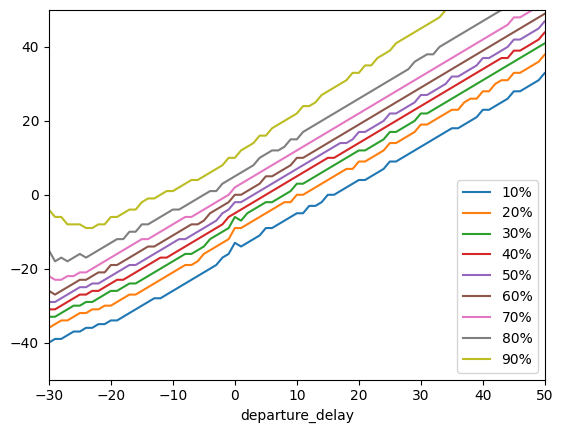

In [38]:
df.drop(labels=['0%', '100%'], axis=1, inplace=True)
df.plot(x='departure_delay', xlim=(-30,50), ylim=(-50,50));